# <strong><font color='red'>Limpieza, transformación y preparación de datos.</font></strong>

En el mundo real, los datos rara vez llegan en un formato limpio y listo para el análisis. Por el contrario, suelen presentar errores, valores faltantes, inconsistencias o estructuras poco útiles. Por ello, la etapa de limpieza, transformación y preparación de datos es fundamental en cualquier proyecto de ciencia de datos. Esta fase permite depurar, estandarizar y adaptar los datos para que puedan ser analizados con rigor y precisión. En esta clase aprenderás a aplicar técnicas básicas para detectar y corregir errores comunes, transformar variables en formatos útiles y preparar los datos para su uso en modelos analíticos o visualizaciones. Una buena preparación de datos no solo mejora la calidad del análisis, sino que también aumenta la confiabilidad de las decisiones basadas en ellos.

In [13]:
#Importar librerías
import pandas as pd
from IPython.display import display, Markdown

## 🔍<strong><font color='blue'>1. Limpieza de datos</font></strong>
<br> La limpieza de datos (o *data cleaning*) es el proceso de identificar, corregir o eliminar errores e inconsistencias en un conjunto de datos con el fin de mejorar su calidad y asegurar su utilidad para el análisis  (Rahm & Do, 2000). Este proceso es esencial en cualquier flujo de trabajo en ciencia de datos, ya que la presencia de datos sucios puede conducir a conclusiones erróneas y decisiones inadecuadas.

**El objetivo de la limpieza de datos es mejorar la calidad del conjunto de datos en términos de:**
- Exactitud: los valores reflejan la realidad.
- Completitud: ausencia de valores faltantes críticos.
- Consistencia: los datos no se contradicen entre sí.
- Uniformidad: los formatos están estandarizados.
- Validez: los datos cumplen con las reglas del dominio.

**Hay cinco etapas fundamentales en todo proceso de limpieza de datos:**
1. Detección y tratamiento de valores faltantes: Imputación, eliminación, interpolación.
2. Eliminación de duplicados: Evita sesgos por registros repetidos.
3. Corrección de errores tipográficos o de codificación: Por ejemplo, "Chile", "chile", "CHILE", "Chilé".
4. Normalización de formatos: Unificación de fechas, unidades de medida, categorías, etc.
5. Filtrado de valores atípicos (outliers): Verificación de valores que están fuera del rango esperado.

**¿Por qué realizar la limpieza de datos?**
- Un análisis con datos sin limpiar puede producir resultados incorrectos o engañosos.
- En muchos proyectos, se estima que el 60–80% del tiempo se dedica a la preparación y limpieza de datos (Dasu & Johnson, 2003).
- La calidad del modelo o visualización depende directamente de la calidad de los datos.

## <strong><font color='blue'>1. Detección y tratamiento de valores faltantes</font></strong>
Los valores faltantes (*missing values*) son uno de los problemas más frecuentes en datasets reales. Pueden originarse por errores de recolección, fallas en sensores, omisiones humanas o restricciones técnicas. Ignorar estos valores puede afectar la representatividad y confiabilidad del análisis estadístico o los modelos predictivos (Little & Rubin, 2019).

Técnicas comunes:
- Eliminación de registros incompletos (listwise deletion)
- Imputación estadística (media, mediana, moda)
- Modelos predictivos para imputación (ej. KNN, regresión múltiple)
- Codificación especial de ausentes (ej. "Sin dato", 9999)

**Pregunta:**
Sí en una encuesta faltan los ingresos de algunos participantes, ¿puede imputarse la media del grupo?.


In [16]:
import pandas as pd
import numpy as np

# 🔹 Crear un DataFrame más complejo con distintos tipos de variables
df = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Pedro', None, 'Marta', 'Luis', 'Sofía'],
    'Edad': [25, np.nan, 35, 29, -5, 25, None],
    'Ciudad': ['Bogotá', 'Medellín', None, 'Medellín', 'Cali', 'Bogotá', 'Cali'],
    'Ingreso': [3500, 4800, np.nan, 5200, 5100, np.nan, 4700],
    'FechaIngreso': ['2023-01-01', '2023-01-05', None, '2023-01-10', '2023-01-12', None, '2023-01-15']
})

# 🔹 Convertir fechas
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')

# 📊 Tabla de valores faltantes antes de la limpieza
faltantes_antes = df.isnull().sum().rename("Faltantes antes")

# ⚙️ Correcciones antes de imputación
# 1. Corregir valores imposibles en Edad
df['Edad'] = df['Edad'].apply(lambda x: np.nan if x < 0 else x)

# 2. Imputar Edad con la mediana
df['Edad'] = df['Edad'].fillna(df['Edad'].median())

# 3. Imputar Ciudad con la moda
df['Ciudad'] = df['Ciudad'].fillna(df['Ciudad'].mode()[0])

# 4. Imputar Ingreso con interpolación lineal
df['Ingreso'] = df['Ingreso'].interpolate(method='linear')

# 5. Imputar Nombre con "Desconocido"
df['Nombre'] = df['Nombre'].fillna('Desconocido')

# 6. Imputar FechaIngreso con forward fill (relleno hacia adelante)
df['FechaIngreso'] = df['FechaIngreso'].ffill()

# 📊 Tabla de valores faltantes después de la limpieza
faltantes_despues = df.isnull().sum().rename("Faltantes después")

# 🧾 Mostrar resumen comparativo
conteo_comparativo = pd.concat([faltantes_antes, faltantes_despues], axis=1)
print("📋 Comparación de valores faltantes antes y después de la limpieza:")
print(conteo_comparativo)

# ✅ Mostrar el DataFrame limpio
print("\n✅ Dataset limpio final:")
print(df)


📋 Comparación de valores faltantes antes y después de la limpieza:
              Faltantes antes  Faltantes después
Nombre                      1                  0
Edad                        2                  0
Ciudad                      1                  0
Ingreso                     2                  0
FechaIngreso                2                  0

✅ Dataset limpio final:
        Nombre  Edad    Ciudad  Ingreso FechaIngreso
0          Ana  25.0    Bogotá   3500.0   2023-01-01
1         Luis  27.0  Medellín   4800.0   2023-01-05
2        Pedro  35.0    Bogotá   5000.0   2023-01-05
3  Desconocido  29.0  Medellín   5200.0   2023-01-10
4        Marta  27.0      Cali   5100.0   2023-01-12
5         Luis  25.0    Bogotá   4900.0   2023-01-12
6        Sofía  27.0      Cali   4700.0   2023-01-15


**Imputaciones realizadas:**
| Variable       | Tipo       | Técnica de imputación                 | Justificación técnica                                                                 |
| -------------- | ---------- | ------------------------------------- | ------------------------------------------------------------------------------------- |
| `Edad`         | Numérica   | **Mediana**                           | Más robusta que la media frente a valores extremos; útil tras eliminar valores < 0    |
| `Ciudad`       | Categórica | **Moda**                              | Es la categoría más frecuente; adecuada cuando hay pocas clases                       |
| `Ingreso`      | Numérica   | **Interpolación lineal**              | Estima valores intermedios en secuencias continuas de tiempo o registros correlativos |
| `Nombre`       | Categórica | **Valor fijo ("Desconocido")**        | Técnica simple para mantener completitud sin inventar información                     |
| `FechaIngreso` | Temporal   | **Forward fill (`ffill()`)**          | Propaga la última fecha conocida hacia abajo, útil en datos secuenciales o logs       |
| `Edad`         | Numérica   | **Eliminación de valores imposibles** | Se eliminó edad negativa (-5), marcándola como NaN antes de imputar                   |


## <strong><font color='blue'>2. Eliminación de duplicados</font></strong>

Los datos duplicados son registros idénticos o casi idénticos que aparecen más de una vez en el dataset, lo que puede inflar resultados o introducir sesgos  (Rahm & Do, 2000).

Causas comunes:
- Errores de carga o combinación de fuentes
- Inserciones múltiples por fallas en sistemas

Técnicas comunes:
- Detección exacta (duplicated() en pandas)
- Detección difusa o aproximada (fuzzy matching)

**Pregunta:**
¿Dos filas idénticas de un mismo paciente podrían hacer que se cuente doble en estadísticas hospitalarias?



**EJEMPLO**
1. Casos donde los duplicados no son exactamente iguales (edad o fecha cambia).
2. Eliminación de duplicados con lógica de negocio: conservar el más reciente.
3. Uso de subset en .duplicated() para comparar solo columnas clave.
4. Conversión y uso de fechas para decidir qué fila conservar.

In [ ]:
import pandas as pd
import numpy as np

# 🔹 Crear un DataFrame con duplicados
df = pd.DataFrame({
    'ID': [101, 102, 102, 103, 104, 104, 104],
    'Nombre': ['Ana', 'Luis', 'Luis', 'Marta', 'Carlos', 'Carlos', 'Carlos'],
    'Edad': [25, 30, 30, 29, 40, 40, 41],
    'Ciudad': ['Bogotá', 'Cali', 'Cali', 'Medellín', 'Cali', 'Cali', 'Cali'],
    'FechaRegistro': ['2023-01-01', '2023-01-05', '2023-01-05', '2023-01-10', 
                      '2023-01-15', '2023-01-15', '2023-01-16']
})

# Convertir fechas a tipo datetime
df['FechaRegistro'] = pd.to_datetime(df['FechaRegistro'])

# Mostrar datos originales
print("📋 Datos originales:")
print(df)

# Duplicados exactos (todas las columnas)
duplicados_totales = df[df.duplicated(keep=False)]
total_duplicados_exactos = duplicados_totales.shape[0]

print(f"\n🔁 Duplicados exactos encontrados: {total_duplicados_exactos}")
print(duplicados_totales)

# Duplicados por columnas clave
subset_cols = ['ID', 'Nombre']
duplicados_parciales = df[df.duplicated(subset=subset_cols, keep=False)]
total_duplicados_parciales = duplicados_parciales.shape[0]

print(f"\n🧩 Duplicados por columnas {subset_cols}: {total_duplicados_parciales}")
print(duplicados_parciales)

# Conteo de duplicados por combinación ID + Nombre
conteo_duplicados = df[df.duplicated(subset=subset_cols, keep=False)]
resumen_conteo = conteo_duplicados.groupby(subset_cols).size().reset_index(name='Cantidad duplicados')

print("\n📈 Resumen de duplicados por combinación ID + Nombre:")
print(resumen_conteo)

# Eliminar duplicados conservando el más reciente (por fecha)
df_sorted = df.sort_values(by='FechaRegistro', ascending=False)
df_cleaned = df_sorted.drop_duplicates(subset=subset_cols, keep='first').sort_values(by='ID')

print("\n✅ Datos después de eliminar duplicados (conservando el más reciente por ID + Nombre):")
print(df_cleaned)

# 🧾 5. Resumen final
print("\n📌 Resumen general:")
print(f"→ Total registros originales: {df.shape[0]}")
print(f"→ Duplicados exactos: {total_duplicados_exactos}")
print(f"→ Duplicados por ['ID', 'Nombre']: {total_duplicados_parciales}")
print(f"→ Registros después de limpieza: {df_cleaned.shape[0]}")


📋 Datos originales:
    ID  Nombre  Edad    Ciudad FechaRegistro
0  101     Ana    25    Bogotá    2023-01-01
1  102    Luis    30      Cali    2023-01-05
2  102    Luis    30      Cali    2023-01-05
3  103   Marta    29  Medellín    2023-01-10
4  104  Carlos    40      Cali    2023-01-15
5  104  Carlos    40      Cali    2023-01-15
6  104  Carlos    41      Cali    2023-01-16

🔁 Duplicados exactos encontrados: 4
    ID  Nombre  Edad Ciudad FechaRegistro
1  102    Luis    30   Cali    2023-01-05
2  102    Luis    30   Cali    2023-01-05
4  104  Carlos    40   Cali    2023-01-15
5  104  Carlos    40   Cali    2023-01-15

🧩 Duplicados por columnas ['ID', 'Nombre']: 5
    ID  Nombre  Edad Ciudad FechaRegistro
1  102    Luis    30   Cali    2023-01-05
2  102    Luis    30   Cali    2023-01-05
4  104  Carlos    40   Cali    2023-01-15
5  104  Carlos    40   Cali    2023-01-15
6  104  Carlos    41   Cali    2023-01-16

📈 Resumen de duplicados por combinación ID + Nombre:
    ID  Nombre  Cant

## <strong><font color='blue'>3. Corrección de errores tipográficos o de codificación</font></strong>

Los errores tipográficos pueden impedir el agrupamiento correcto de categorías (Batini & Scannapieco, 2006). Por ejemplo, "bogotá", "Bogota", "BOGOTA" deberían considerarse la misma entidad. Son comunes en datos de entrada manual, encuestas o bases consolidadas. Estos errores pueden:
- Impedir el correcto agrupamiento,
- Generar categorías artificiales y dispersas, y
- Distorsionar estadísticas y visualizaciones.


**EJEMPLO**
| Técnica                   | Propósito                                                           |
| ------------------------- | ------------------------------------------------------------------- |
| `lower()`, `strip()`      | Uniformar mayúsculas y espacios                                     |
| `unicodedata.normalize()` | Eliminar acentos y caracteres especiales (ej. “calí” → “cali”)      |
| `get_close_matches()`     | Corregir errores usando similitud léxica (algoritmo de Levenshtein) |
| Diccionario de referencia | Establecer formas válidas de escritura                              |


In [15]:
import pandas as pd
import numpy as np
import unicodedata
from difflib import get_close_matches

# 🔹 Dataset con variaciones y errores en nombres de ciudad
df = pd.DataFrame({
    'Ciudad': ['bogota', 'Bogotá', 'BOGOTA', 'bogotá', 'bogata', 'Bógota', 'BogoTa', 'Cali', 'calí', 'medellín', 'medellin']
})

print("📋 Datos originales:")
print(df['Ciudad'].value_counts())

# 🔧 Función de limpieza robusta
def limpiar_texto(texto):
    if pd.isnull(texto):
        return texto
    texto = texto.lower().strip()                            # Minúsculas y espacios
    texto = unicodedata.normalize('NFKD', texto)             # Eliminar tildes
    texto = ''.join([c for c in texto if not unicodedata.combining(c)])
    return texto

df['Ciudad_limpia'] = df['Ciudad'].apply(limpiar_texto)

# 📘 Diccionario de equivalencias manual (puede ampliarse o construirse automáticamente)
valores_unicos = df['Ciudad_limpia'].unique()
referencias = ['bogota', 'cali', 'medellin']

def corregir_ciudad(ciudad, lista_referencia):
    coincidencias = get_close_matches(ciudad, lista_referencia, n=1, cutoff=0.8)
    return coincidencias[0] if coincidencias else ciudad

df['Ciudad_estandar'] = df['Ciudad_limpia'].apply(lambda x: corregir_ciudad(x, referencias))

print("\n✅ Ciudad estandarizada:")
print(df['Ciudad_estandar'].value_counts())


📋 Datos originales:
Ciudad
bogota      1
Bogotá      1
BOGOTA      1
bogotá      1
bogata      1
Bógota      1
BogoTa      1
Cali        1
calí        1
medellín    1
medellin    1
Name: count, dtype: int64

✅ Ciudad estandarizada:
Ciudad_estandar
bogota      7
cali        2
medellin    2
Name: count, dtype: int64


## <strong><font color='blue'>4. Normalización de formatos</font></strong> 
Los datos pueden venir en diferentes formatos que dificultan el análisis: fechas en distintos estándares, unidades inconsistentes, uso de comas o puntos decimales, etc (Kandel et al., 2011).

**EJEMPLO**
| Problema detectado               | Corrección aplicada                           |
| -------------------------------- | --------------------------------------------- |
| Fechas con distintos separadores | Uso de `pd.to_datetime()` + `dayfirst=True`   |
| Temperaturas con °, F, celsius   | Limpieza textual + conversión F → C           |
| Alturas con cm, m, coma/punto    | Conversión uniforme a metros                  |
| Montos con punto/coma/espacios   | Regex + reemplazos controlados para `float()` |


In [18]:
import pandas as pd
import numpy as np

# 🔹 Dataset con problemas comunes en el formato
df = pd.DataFrame({
    'Fecha': ['12/01/2024', '2024-01-13', '13-01-2024', '14.01.2024', None],
    'Temperatura': ['30°C', '28 C', '31.5 celsius', '85°F', None],
    'Altura': ['1.70', '170 cm', '1,65', '165cm', '1.80 m'],
    'Monto': ['1,200.50', '1.200,50', '1200,50', '1 200.50', 'USD 1.250,75']
})
print("📋 Datos originales con formatos inconsistentes:")
print(df)

# 🔧 1. Normalizar fechas
def normalizar_fecha(fecha):
    try:
        return pd.to_datetime(fecha, dayfirst=True, errors='coerce')
    except:
        return np.nan

df['Fecha'] = df['Fecha'].apply(normalizar_fecha)

# 🔧 2. Normalizar temperatura a °C
def limpiar_temp(valor):
    if pd.isnull(valor):
        return np.nan
    valor = valor.lower().replace('°', '').replace('celsius', 'c').strip()
    if 'f' in valor:
        f = float(''.join([c for c in valor if c.isdigit() or c == '.']))
        return round((f - 32) * 5 / 9, 1)  # Fahrenheit a Celsius
    else:
        return float(''.join([c for c in valor if c.isdigit() or c == '.']))

df['Temperatura_C'] = df['Temperatura'].apply(limpiar_temp)

# 🔧 3. Normalizar altura en metros
def limpiar_altura(valor):
    if pd.isnull(valor):
        return np.nan
    valor = valor.replace(',', '.').lower()
    if 'cm' in valor:
        n = float(''.join([c for c in valor if c.isdigit() or c == '.']))
        return round(n / 100, 2)
    else:
        n = float(''.join([c for c in valor if c.isdigit() or c == '.']))
        return round(n, 2)

df['Altura_m'] = df['Altura'].apply(limpiar_altura)

# 🔧 4. Normalizar montos a float
import re
def limpiar_monto(monto):
    if pd.isnull(monto):
        return np.nan
    monto = monto.replace('USD', '').replace(' ', '').strip()
    # Detecta coma decimal y punto de miles vs al revés
    if re.match(r'\d+\.\d{3},\d{2}', monto):  # ejemplo: 1.200,50
        monto = monto.replace('.', '').replace(',', '.')
    elif re.match(r'\d+,\d{2}', monto):       # ejemplo: 1200,50
        monto = monto.replace(',', '.')
    elif ',' in monto and '.' in monto:       # ejemplo: 1,200.50
        monto = monto.replace(',', '')
    else:
        monto = monto.replace(',', '.')
    try:
        return float(monto)
    except:
        return np.nan

df['Monto_float'] = df['Monto'].apply(limpiar_monto)

# ✅ Mostrar resultado final
print("\n✅ Datos con formatos corregidos:")
print(df[['Fecha', 'Temperatura_C', 'Altura_m', 'Monto_float']])


📋 Datos originales con formatos inconsistentes:
        Fecha   Temperatura  Altura         Monto
0  12/01/2024          30°C    1.70      1,200.50
1  2024-01-13          28 C  170 cm      1.200,50
2  13-01-2024  31.5 celsius    1,65       1200,50
3  14.01.2024          85°F   165cm      1 200.50
4        None          None  1.80 m  USD 1.250,75

✅ Datos con formatos corregidos:
       Fecha  Temperatura_C  Altura_m  Monto_float
0 2024-01-12           30.0      1.70          NaN
1 2024-01-13           28.0      1.70      1200.50
2 2024-01-13           31.5      1.65      1200.50
3 2024-01-14           29.4      1.65      1200.50
4        NaT            NaN      1.80      1250.75


C:\Users\bernarda.salazar\AppData\Local\Temp\ipykernel_19992\2443238241.py:17: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(fecha, dayfirst=True, errors='coerce')


## <strong><font color='blue'>5. Filtrado de valores atípicos (outliers)</font></strong> 

Los valores extremos pueden ser errores, casos únicos o puntos importantes para análisis. Detectarlos requiere contexto del dominio y puede hacerse con técnicas como el rango intercuartílico (IQR), desviación estándar o modelos estadísticos (Aggarwal, 2017).

Los valores atípicos son observaciones que se alejan significativamente del patrón general del conjunto de datos. Su presencia puede indicar:
- Errores de medición o digitación (ej. una edad de 210 años)
- Casos excepcionales que deben estudiarse (como fraudes o eventos anómalos)
- Variabilidad natural de procesos complejos (como ingresos extremos)


### **5.1. Rango Intercuartílico (IQR)**
El IQR (Interquartile Range) es una medida de dispersión que describe la distancia entre el primer cuartil (Q1, percentil 25) y el tercer cuartil (Q3, percentil 75) de un conjunto de datos Tukey, 1977).
<br> IQR = Q3 - Q1

✅ Ventajas:
- Robusto frente a valores extremos.
- No depende de la distribución normal de los datos.

⚠️ Limitaciones:

📘 Ejemplo:
<br> Si Q1 = 20 y Q3 = 40, entonces IQR = 20.

✅  Interpretación: 
- ¿Qué significa un valor menor que 20?
- ¿Qué significa un valor mayor que 40?

C:\Users\bernarda.salazar\AppData\Local\Temp\ipykernel_19992\4245030202.py:69: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


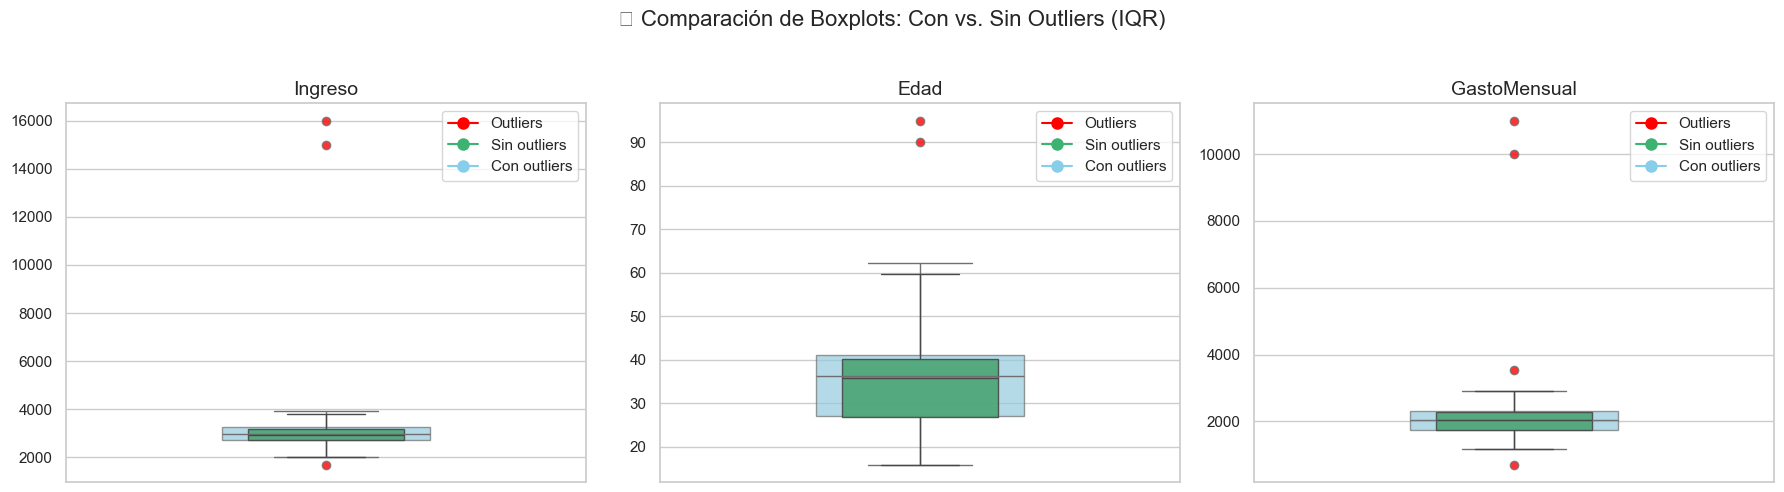

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Simulación de datos con outliers intencionados
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'Ingreso': np.append(np.random.normal(3000, 500, n), [15000, 16000]),
    'Edad': np.append(np.random.normal(35, 10, n), [90, 95]),
    'GastoMensual': np.append(np.random.normal(2000, 400, n), [10000, 11000])
})

# 🧮 Función para detectar outliers con IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return (serie < lim_inf) | (serie > lim_sup)

# 🔎 Detectar outliers por columna
outliers = pd.DataFrame({col: detectar_outliers_iqr(df[col]) for col in df.columns})
df_clean = df[~outliers.any(axis=1)].reset_index(drop=True)

# 🎨 Visualización con boxplots
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# 🔴 Props para fliers (outliers)
flier_props = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none', alpha=0.8)

for i, col in enumerate(df.columns):
    ax = axes[i]
    
    # Boxplot con outliers
    sns.boxplot(
        y=df[col], ax=ax, color='skyblue', width=0.4,
        boxprops=dict(alpha=0.7),
        flierprops=flier_props,
        showfliers=True
    )
    
    # Boxplot sin outliers
    sns.boxplot(
        y=df_clean[col], ax=ax, color='mediumseagreen', width=0.3,
        boxprops=dict(alpha=0.9),
        showfliers=False
    )
    
    ax.set_title(f"{col}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    # Leyenda personalizada
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='red', label='Outliers',
                   markerfacecolor='red', markersize=8),
        plt.Line2D([0], [0], marker='o', color='mediumseagreen', label='Sin outliers',
                   markerfacecolor='mediumseagreen', markersize=8),
        plt.Line2D([0], [0], marker='o', color='skyblue', label='Con outliers',
                   markerfacecolor='skyblue', markersize=8)
    ]
    ax.legend(handles=legend_elements, loc='upper right')

fig.suptitle("📊 Comparación de Boxplots: Con vs. Sin Outliers (IQR)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


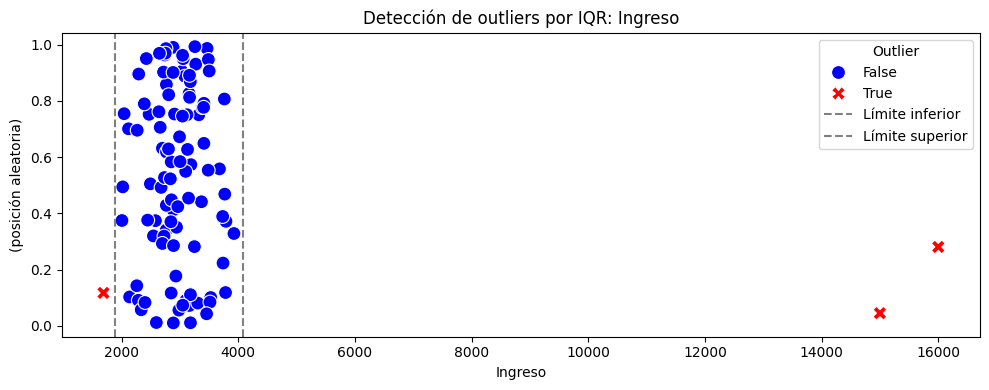

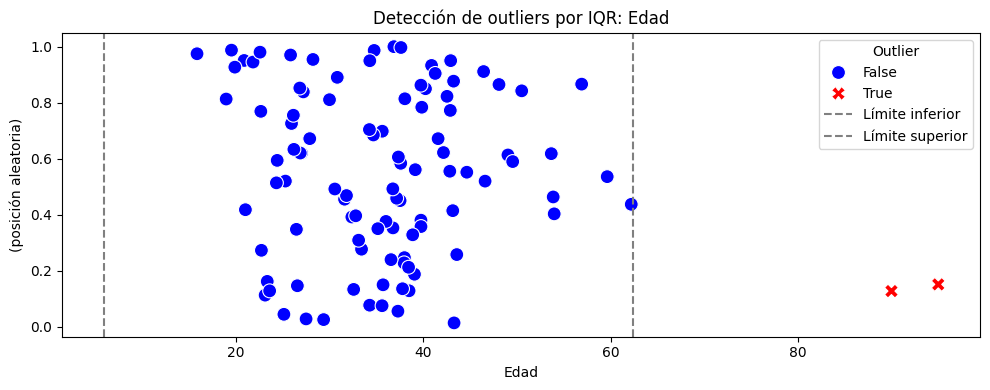

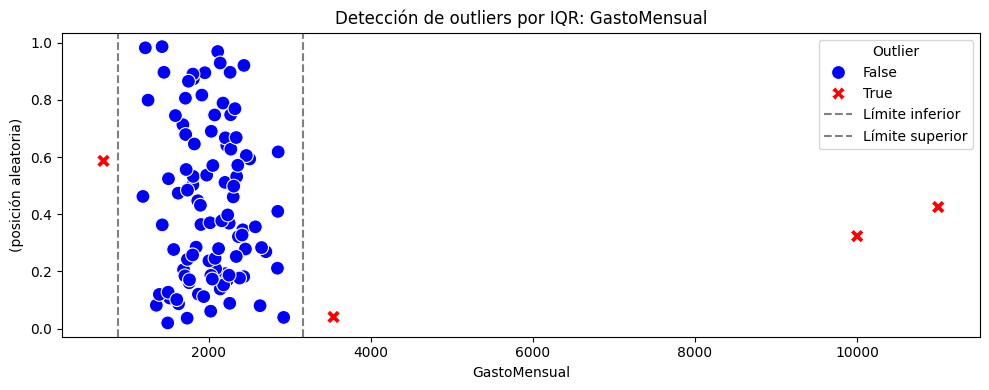

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Simular un DataFrame con múltiples variables y valores atípicos
np.random.seed(42)
n = 100

df = pd.DataFrame({
    'Ingreso': np.append(np.random.normal(3000, 500, n), [15000, 16000]),
    'Edad': np.append(np.random.normal(35, 10, n), [90, 95]),
    'GastoMensual': np.append(np.random.normal(2000, 400, n), [10000, 11000])
})

# 🔁 Recorrer cada variable y graficar con outliers
for col in df.columns:
    # Calcular IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Detectar outliers
    df['Outlier'] = (df[col] < lim_inf) | (df[col] > lim_sup)

    # Eje Y ficticio para visualización sin solapamiento
    df['y'] = np.random.uniform(0, 1, size=len(df))

    # Gráfica
    plt.figure(figsize=(10, 4))
    sns.scatterplot(
        data=df,
        x=col,
        y='y',
        hue='Outlier',
        palette={True: 'red', False: 'blue'},
        style='Outlier',
        markers={True: 'X', False: 'o'},
        s=100
    )

    plt.axvline(lim_inf, linestyle='--', color='gray', label='Límite inferior')
    plt.axvline(lim_sup, linestyle='--', color='gray', label='Límite superior')

    plt.title(f'Detección de outliers por IQR: {col}')
    plt.xlabel(col)
    plt.ylabel('(posición aleatoria)')
    plt.legend(title='Outlier')
    plt.tight_layout()
    plt.show()


### **5.2. Desviación Estándar (Z-score)**
El Z-score mide cuántas desviaciones estándar se aleja un valor de la media. Valores con |Z| > 2 o 3 suelen considerarse outliers (Barnett, 1994).
<br> Z = (X - μ)/σ

✅ Ventajas:
- Fácil de aplicar.
- Útil para variables numéricas en distribuciones normales.

⚠️ Limitaciones:
- Sensible a outliers extremos que afectan la media y la desviación.
- No adecuado si los datos no son simétricos o normales.

📘 Ejemplo:
<br> Supongamos la siguiente muestra de ingresos mensuales (en dólares):
<br> 𝑋 ={1000, 1100, 1200, 1150, 1300, 1250, 5000}
- Media, μ:1714.2
- Desviación estándar, σ≈1336.42 
- Z-score de cada valor, Por ejemplo, para el valor 𝑥=5000, Z≈2.46

✅ Interpretación: ¿Qué pasa si consideramos como umbral ∣Z∣>2?


C:\Users\bernarda.salazar\AppData\Local\Temp\ipykernel_19992\2719467059.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


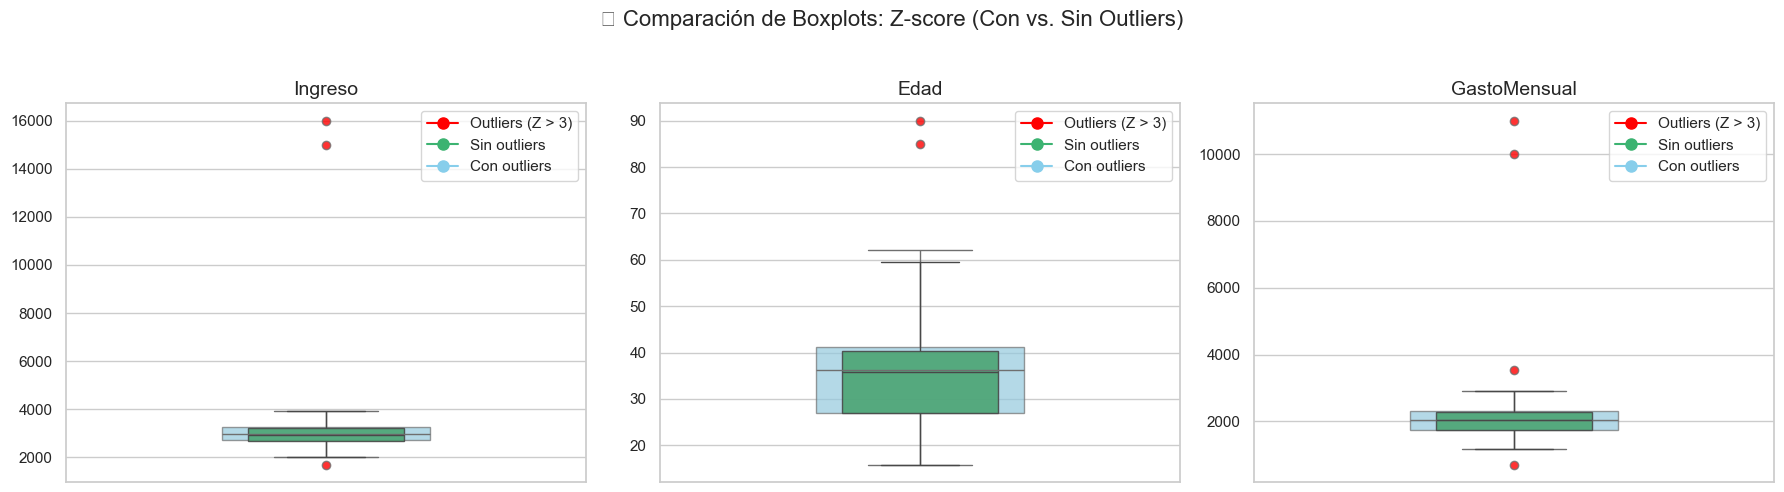


📌 Número de valores atípicos por variable (Z > 3):
Ingreso         2
Edad            2
GastoMensual    2
dtype: int64

✅ Registros iniciales: 102
✅ Registros sin outliers: 100


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 🔹 Simulación de datos con valores atípicos intencionales
np.random.seed(42)
n = 100

df = pd.DataFrame({
    'Ingreso': np.random.normal(3000, 500, n).tolist() + [15000, 16000],
    'Edad': np.random.normal(35, 10, n).tolist() + [85, 90],
    'GastoMensual': np.random.normal(2000, 400, n).tolist() + [10000, 11000]
})

# 🧮 Cálculo de Z-score
z_scores = np.abs(zscore(df))

# 🚩 Detección de outliers: Z > 3
outliers = (z_scores > 3).any(axis=1)
df_clean = df[~outliers].reset_index(drop=True)

# 🎨 Configurar estilo
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# 🔴 Props personalizados para outliers
flier_props = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none', alpha=0.8)

for i, col in enumerate(df.columns):
    ax = axes[i]
    
    # Boxplot original (con outliers)
    sns.boxplot(
        y=df[col], ax=ax, color='skyblue', width=0.4,
        boxprops=dict(alpha=0.7),
        flierprops=flier_props,
        showfliers=True
    )
    
    # Boxplot limpio (sin outliers)
    sns.boxplot(
        y=df_clean[col], ax=ax, color='mediumseagreen', width=0.3,
        boxprops=dict(alpha=0.9),
        showfliers=False
    )
    
    ax.set_title(f"{col}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    # 🔖 Leyenda personalizada
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='red', label='Outliers (Z > 3)',
                   markerfacecolor='red', markersize=8),
        plt.Line2D([0], [0], marker='o', color='mediumseagreen', label='Sin outliers',
                   markerfacecolor='mediumseagreen', markersize=8),
        plt.Line2D([0], [0], marker='o', color='skyblue', label='Con outliers',
                   markerfacecolor='skyblue', markersize=8)
    ]
    ax.legend(handles=legend_elements, loc='upper right')

# 🧾 Título y resultados
fig.suptitle("📊 Comparación de Boxplots: Z-score (Con vs. Sin Outliers)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 📋 Conteo de outliers
print("\n📌 Número de valores atípicos por variable (Z > 3):")
print((z_scores > 3).sum())
print(f"\n✅ Registros iniciales: {len(df)}")
print(f"✅ Registros sin outliers: {len(df_clean)}")


### **5.3. Modelos estadísticos y multivariados**
Estos métodos detectan outliers en función de relaciones entre múltiples variables, usando algoritmos que modelan la estructura de los datos (Aggarwal, 2017). 


✅ Ventajas:
- Capturan relaciones no lineales y multivariadas.
- Escalables a grandes conjuntos de datos.

⚠️ Limitaciones:
- Mayor configuración y conocimiento técnico.
- Ajuste de hiperparámetros como contaminación esperada.

📘 Ejemplo:
- DBSCAN: Detecta puntos aislados según densidad de vecinos.
- Isolation Forest: Algoritmo de árboles que “aísla” observaciones inusuales. Funciona bien en problemas multivariados y no necesita supuestos de distribución.
- Elliptic Envelope: Supone una distribución elíptica (multivariada normal) y detecta puntos externos.


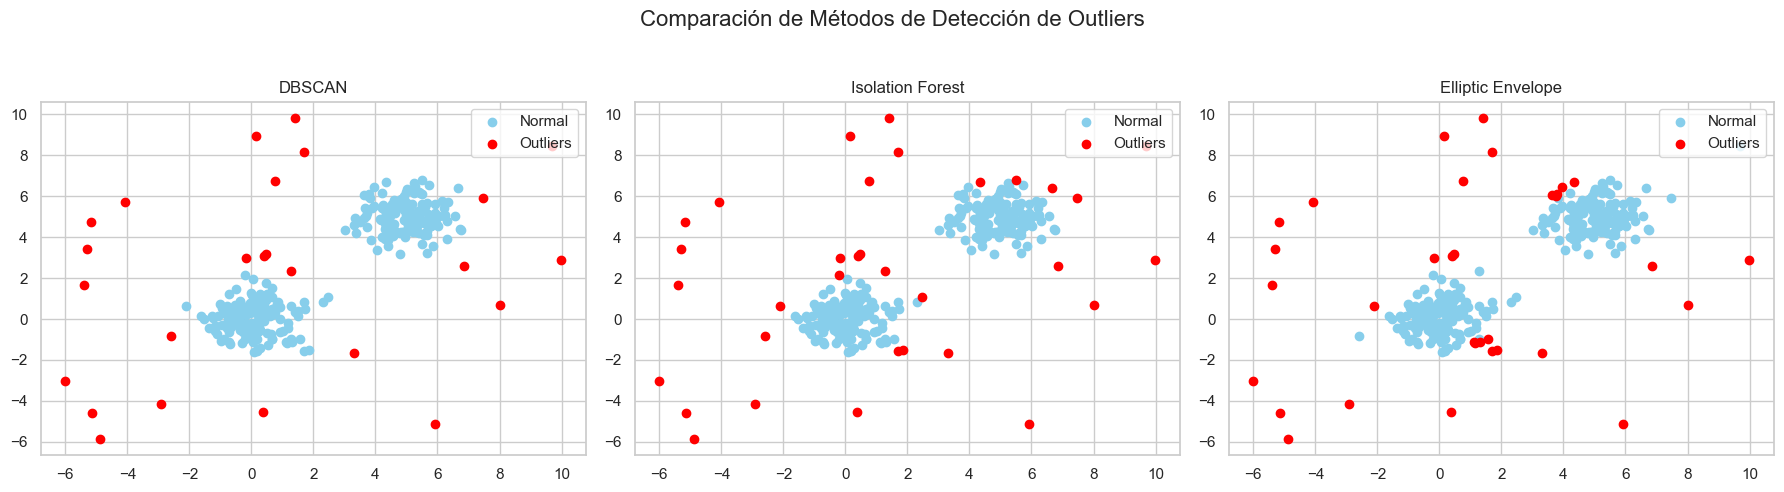

📊 Tabla de métricas comparativas:

              Método  Outliers detectados  Proporción (%)  Media X1  Media X2  \
0             DBSCAN                   25            7.58      2.53      2.51   
1   Isolation Forest                   33           10.00      2.53      2.50   
2  Elliptic Envelope                   33           10.00      2.56      2.54   

   Desv X1  Desv X2  
0     2.60     2.59  
1     2.60     2.57  
2     2.68     2.56  


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

# 🔹 Datos simulados: 2 clusters con ruido
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=[[0, 0], [5, 5]], cluster_std=0.8)
X = np.vstack([X, np.random.uniform(low=-6, high=10, size=(30, 2))])  # Ruido
df = pd.DataFrame(X, columns=["X1", "X2"])

# 📦 DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)
dbscan_outliers = dbscan_labels == -1
df_dbscan_clean = df[~dbscan_outliers]

# 🌲 Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
iso_labels = iso.fit_predict(X)
iso_outliers = iso_labels == -1
df_iso_clean = df[~iso_outliers]

# 🔵 Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.1)
elliptic_labels = elliptic.fit_predict(X)
elliptic_outliers = elliptic_labels == -1
df_elliptic_clean = df[~elliptic_outliers]

# 🎨 Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, labels, title in zip(
    axes,
    [dbscan_outliers, iso_outliers, elliptic_outliers],
    ["DBSCAN", "Isolation Forest", "Elliptic Envelope"]
):
    ax.scatter(X[~labels][:, 0], X[~labels][:, 1], c='skyblue', label='Normal')
    ax.scatter(X[labels][:, 0], X[labels][:, 1], c='red', label='Outliers')
    ax.set_title(title)
    ax.legend(loc='upper right')

plt.suptitle("Comparación de Métodos de Detección de Outliers", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 📈 Métricas comparativas
def calcular_metricas(df_original, df_filtrado, metodo):
    outliers_detectados = len(df_original) - len(df_filtrado)
    proporcion = round(outliers_detectados / len(df_original) * 100, 2)
    media_x1 = round(df_filtrado["X1"].mean(), 2)
    media_x2 = round(df_filtrado["X2"].mean(), 2)
    desv_x1 = round(df_filtrado["X1"].std(), 2)
    desv_x2 = round(df_filtrado["X2"].std(), 2)

    return {
        "Método": metodo,
        "Outliers detectados": outliers_detectados,
        "Proporción (%)": proporcion,
        "Media X1": media_x1,
        "Media X2": media_x2,
        "Desv X1": desv_x1,
        "Desv X2": desv_x2
    }

# 🧾 Generar tabla de métricas
metricas = pd.DataFrame([
    calcular_metricas(df, df_dbscan_clean, "DBSCAN"),
    calcular_metricas(df, df_iso_clean, "Isolation Forest"),
    calcular_metricas(df, df_elliptic_clean, "Elliptic Envelope")
])

print("📊 Tabla de métricas comparativas:\n")
print(metricas)



## <strong><font color='blue'>Comparación de Métodos de Detección de Outliers:</font></strong>






### **Ejemplo 1: Un Clúster con Ruido para Comparar DBSCAN, Isolation Forest, Elliptic Envelope, Z-score e IQR**
Simulación de un escenario de detección de valores atípicos, aplicando cinco (5) técnicas, en un conjunto multivariado con variables correlacionadas, ruido estructurado y outliers intencionales.

📊 Tabla de comparación de métricas:

              Método  Outliers detectados  Proporción (%)  Media Ingreso  \
0             DBSCAN                    4            0.80        2999.39   
1   Isolation Forest                   16            3.18        3004.07   
2  Elliptic Envelope                   16            3.18        3000.97   
3                IQR                   13            2.58        3000.43   
4            Z-score                    4            0.80        2999.39   

   Media Gasto  Media Presupuesto  Desv Ingreso  Desv Gasto  Desv Presupuesto  
0      2108.12            2563.12        676.88      533.92            605.15  
1      2111.42            2572.95        640.77      514.36            587.46  
2      2112.03            2572.44        656.12      516.89            579.81  
3      2110.21            2573.57        654.31      512.93            597.10  
4      2108.12            2563.12        676.88      533.92            605.15  


C:\Users\bernarda.salazar\AppData\Local\Temp\ipykernel_19992\921185720.py:112: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


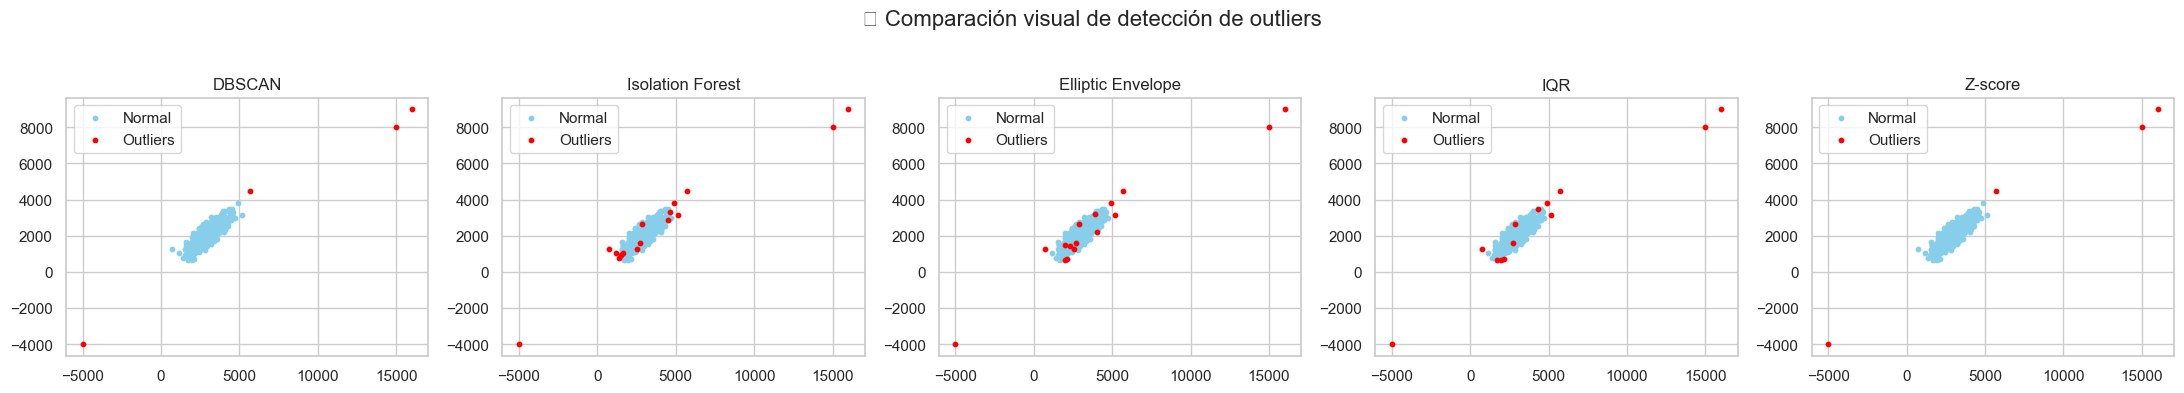

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from scipy.stats import zscore

# 🔹 Simulación de datos complejos
np.random.seed(42)
n = 500

X1 = np.random.normal(loc=3000, scale=700, size=n)
X2 = X1 * 0.7 + np.random.normal(0, 300, size=n)  # correlación artificial
X3 = np.random.normal(loc=2500, scale=600, size=n)

# Outliers intencionados
X1 = np.append(X1, [15000, 16000, -5000])
X2 = np.append(X2, [8000, 9000, -4000])
X3 = np.append(X3, [10000, -3000, 12000])

df = pd.DataFrame({'Ingreso': X1, 'Gasto': X2, 'Presupuesto': X3})

# 🔍 Escalar para métodos multivariados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 🔎 Z-score
z_scores = np.abs(zscore(df))
z_outliers = (z_scores > 3).any(axis=1)
df_z_clean = df[~z_outliers]

# 🔎 IQR por variable
def detectar_outliers_iqr(df):
    mask = pd.Series(False, index=df.index)
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask |= (df[col] < lower) | (df[col] > upper)
    return mask

iqr_outliers = detectar_outliers_iqr(df)
df_iqr_clean = df[~iqr_outliers]

# 📦 DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=15)
dbscan_labels = dbscan.fit_predict(df_scaled)
dbscan_outliers = dbscan_labels == -1
df_dbscan_clean = df[~dbscan_outliers]

# 🌲 Isolation Forest
iso = IsolationForest(contamination=0.03, random_state=42)
iso_labels = iso.fit_predict(df_scaled)
iso_outliers = iso_labels == -1
df_iso_clean = df[~iso_outliers]

# 🔵 Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.03)
elliptic_labels = elliptic.fit(df_scaled).predict(df_scaled)
elliptic_outliers = elliptic_labels == -1
df_elliptic_clean = df[~elliptic_outliers]

# 📈 Función de métricas
def calcular_metricas(df_original, df_filtrado, metodo):
    outliers = len(df_original) - len(df_filtrado)
    prop = round(outliers / len(df_original) * 100, 2)
    mean = df_filtrado.mean().round(2).to_dict()
    std = df_filtrado.std().round(2).to_dict()
    return {
        'Método': metodo,
        'Outliers detectados': outliers,
        'Proporción (%)': prop,
        'Media Ingreso': mean['Ingreso'],
        'Media Gasto': mean['Gasto'],
        'Media Presupuesto': mean['Presupuesto'],
        'Desv Ingreso': std['Ingreso'],
        'Desv Gasto': std['Gasto'],
        'Desv Presupuesto': std['Presupuesto']
    }

# 🧾 Comparación
tabla_metricas = pd.DataFrame([
    calcular_metricas(df, df_dbscan_clean, 'DBSCAN'),
    calcular_metricas(df, df_iso_clean, 'Isolation Forest'),
    calcular_metricas(df, df_elliptic_clean, 'Elliptic Envelope'),
    calcular_metricas(df, df_iqr_clean, 'IQR'),
    calcular_metricas(df, df_z_clean, 'Z-score')
])

print("📊 Tabla de comparación de métricas:\n")
print(tabla_metricas)

# 🎨 Visualización del filtrado
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 5, figsize=(22, 4))
metodos = ['DBSCAN', 'Isolation Forest', 'Elliptic Envelope', 'IQR', 'Z-score']
datasets = [~dbscan_outliers, ~iso_outliers, ~elliptic_outliers, ~iqr_outliers, ~z_outliers]

for ax, title, mask in zip(axes, metodos, datasets):
    ax.scatter(df[mask]['Ingreso'], df[mask]['Gasto'], c='skyblue', s=10, label='Normal')
    ax.scatter(df[~mask]['Ingreso'], df[~mask]['Gasto'], c='red', s=10, label='Outliers')
    ax.set_title(title)
    ax.legend()

plt.suptitle("Comparación visual de detección de outliers", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **Ejemplo 2: Dos Clústeres con Ruido para Comparar DBSCAN, Isolation Forest, Elliptic Envelope, Z-score e IQR**

📊 Tabla comparativa:

              Método  Outliers detectados  Proporción (%)  Media X1  Media X2  \
0             DBSCAN                   12            2.86      2.47      2.51   
1   Isolation Forest                   21            5.00      2.45      2.49   
2  Elliptic Envelope                   21            5.00      2.46      2.49   
3                IQR                    0            0.00      2.44      2.48   
4            Z-score                    1            0.24      2.45      2.50   

   Desv X1  Desv X2  
0     2.56     2.55  
1     2.53     2.55  
2     2.56     2.53  
3     2.62     2.69  
4     2.60     2.66  


C:\Users\bernarda.salazar\AppData\Local\Temp\ipykernel_19992\658332814.py:99: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\bernarda.salazar\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


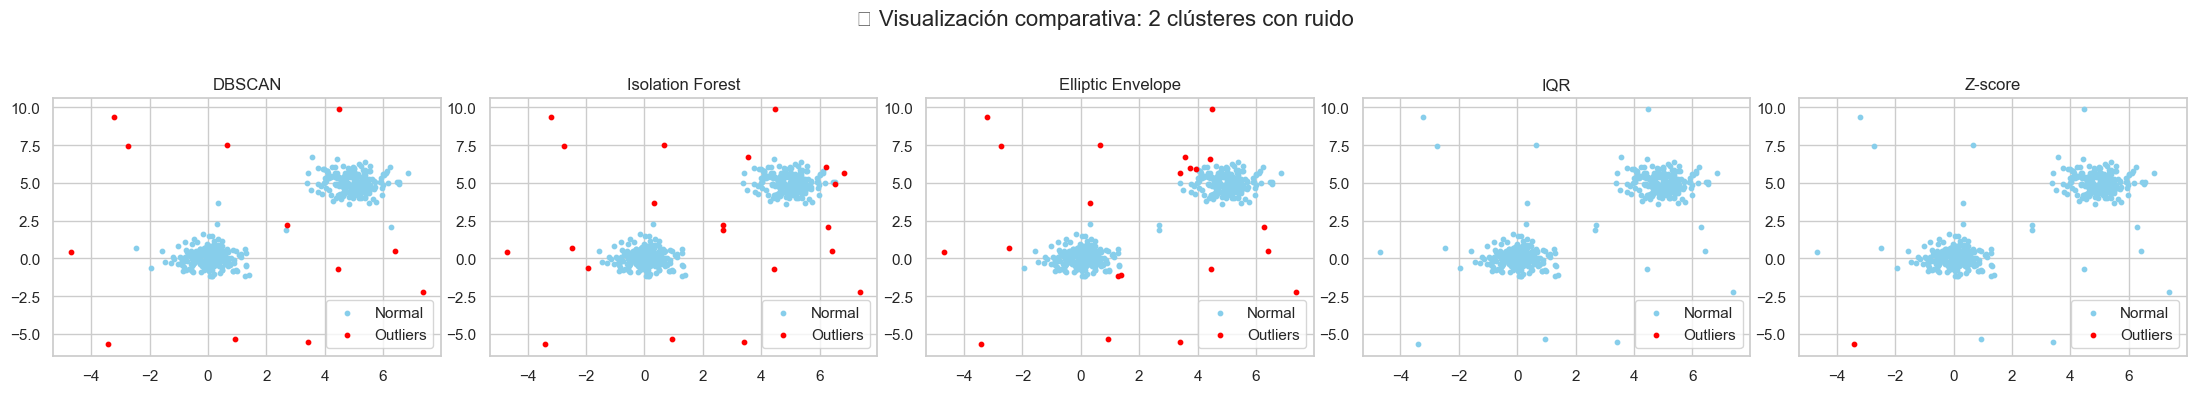

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from scipy.stats import zscore

# 🔹 Generar datos: 2 clústeres y ruido
np.random.seed(42)
X_core, _ = make_blobs(n_samples=400, centers=[[0, 0], [5, 5]], cluster_std=0.6)
X_noise = np.random.uniform(low=-6, high=10, size=(20, 2))
X = np.vstack([X_core, X_noise])
df = pd.DataFrame(X, columns=["X1", "X2"])
scaled_X = StandardScaler().fit_transform(X)

# 📍 DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_X)
dbscan_outliers = dbscan_labels == -1
df_dbscan_clean = df[~dbscan_outliers]

# 🌲 Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso.fit_predict(scaled_X)
iso_outliers = iso_labels == -1
df_iso_clean = df[~iso_outliers]

# 🔵 Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.05)
elliptic_labels = elliptic.fit(scaled_X).predict(scaled_X)
elliptic_outliers = elliptic_labels == -1
df_elliptic_clean = df[~elliptic_outliers]

# ✴️ Z-score
z_scores = np.abs(zscore(df))
z_outliers = (z_scores > 3).any(axis=1)
df_z_clean = df[~z_outliers]

# 📊 IQR
def detectar_outliers_iqr(df):
    mask = pd.Series(False, index=df.index)
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask |= (df[col] < lower) | (df[col] > upper)
    return mask

iqr_outliers = detectar_outliers_iqr(df)
df_iqr_clean = df[~iqr_outliers]

# 📈 Métricas comparativas
def calcular_metricas(df_original, df_filtrado, metodo):
    outliers = len(df_original) - len(df_filtrado)
    prop = round(outliers / len(df_original) * 100, 2)
    mean = df_filtrado.mean().round(2).to_dict()
    std = df_filtrado.std().round(2).to_dict()
    return {
        'Método': metodo,
        'Outliers detectados': outliers,
        'Proporción (%)': prop,
        'Media X1': mean['X1'],
        'Media X2': mean['X2'],
        'Desv X1': std['X1'],
        'Desv X2': std['X2']
    }

# 🧾 Generar tabla
tabla_metricas = pd.DataFrame([
    calcular_metricas(df, df_dbscan_clean, 'DBSCAN'),
    calcular_metricas(df, df_iso_clean, 'Isolation Forest'),
    calcular_metricas(df, df_elliptic_clean, 'Elliptic Envelope'),
    calcular_metricas(df, df_iqr_clean, 'IQR'),
    calcular_metricas(df, df_z_clean, 'Z-score')
])

print("📊 Tabla comparativa:\n")
print(tabla_metricas)

# 🎨 Visualización
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 5, figsize=(22, 4))
metodos = ['DBSCAN', 'Isolation Forest', 'Elliptic Envelope', 'IQR', 'Z-score']
máscaras = [~dbscan_outliers, ~iso_outliers, ~elliptic_outliers, ~iqr_outliers, ~z_outliers]

for ax, metodo, mask in zip(axes, metodos, máscaras):
    ax.scatter(df[mask]['X1'], df[mask]['X2'], c='skyblue', s=10, label='Normal')
    ax.scatter(df[~mask]['X1'], df[~mask]['X2'], c='red', s=10, label='Outliers')
    ax.set_title(metodo)
    ax.legend()

plt.suptitle("🔍 Visualización comparativa: 2 clústeres con ruido", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **¿Qué deberías considerar?**
1. Naturaleza del dataset. 
   - Si tienes variables normalmente distribuidas: 👉 Elliptic Envelope puede ser una opción sólida.
   - Si el dataset es muy ruidoso o sin forma clara: 👉 Isolation Forest o IQR funcionan mejor.
   - Si hay estructura tipo clusters: 👉 DBSCAN detecta puntos fuera de la densidad fácilmente.

2. Escalabilidad
   - Para datasets grandes (miles o millones de registros): 👉 Isolation Forest destaca por su velocidad.
   - Para análisis rápido y simple en variables individuales: 👉 Z-score o IQR son fáciles y efectivos.

3. Multivarianza
   <br> Si necesitas detectar outliers en el comportamiento conjunto de variables: 
      - 👉 Isolation Forest, Elliptic Envelope y DBSCAN permiten esa detección.
      -  👉 Z-score e IQR trabajan por variable separada.

4. Sensibilidad
   - Si el método está siendo muy “duro” y elimina demasiado, revisa la proporción de outliers detectados (como en la tabla que generaste).
   - Puedes ajustar los parámetros: 
       - `contamination` en Isolation Forest y Elliptic Envelope
       - `eps` y `min_samples` en DBSCAN
       - Umbral en Z-score (e.g. Z > 2.5 en vez de Z > 3)

### **Tabla comparativa de técnicas de detección de outliers**

| **Aspecto**                   | **Z-score** 🔢                    | **IQR (cuartiles)** 📐              | **DBSCAN** 🧩                         | **Isolation Forest** 🌲              | **Elliptic Envelope** 🔵            |
|------------------------------|----------------------------------|------------------------------------|--------------------------------------|--------------------------------------|-------------------------------------|
| **Enfoque**                  | Desviación estándar              | Rango intercuartílico              | Densidad de clústeres                | Aislamiento basado en árboles        | Covarianza multivariada            |
| **Supone distribución normal** | ✅ Sí                           | ❌ No                               | ❌ No                                 | ❌ No                                 | ✅ Sí                               |
| **Sensibilidad a escala**    | ✅ Alta                           | ❌ Baja                             | ✅ Alta                               | ✅ Alta                               | ✅ Alta                             |
| **Robustez ante ruido**      | ❌ Débil                          | ⚠️ Intermedia                       | ✅ Alta                               | ✅ Alta                               | ⚠️ Limitada                         |
| **Detección multivariada**   | ❌ No                             | ❌ No                               | ✅ Sí                                 | ✅ Sí                                 | ✅ Sí                               |
| **Forma que modela**         | Simetría univariante             | Caja por variable                  | Clústeres irregulares                | Frontera aleatoria                   | Elipse de Mahalanobis              |
| **Parámetros clave**         | `threshold` (ej. Z > 3)          | `factor` (ej. 1.5 × IQR)            | `eps`, `min_samples`                | **`contamination`**, `n_estimators` | **`contamination`**               |
| **Ventajas**                 | Rápido y fácil                   | Simple y sin supuestos fuertes     | Detecta ruido estructurado           | Escalable y adaptativo               | Eficiente en datos gaussianos      |
| **Limitaciones**             | ❌ Falla en distribuciones sesgadas | ❌ Ignora correlaciones           | ⚠️ Sensible a parámetros              | ⚠️ Requiere ajuste fino              | ❌ Pobre en datos no normales       |

📌 **Notas clave:**

- Z-score e IQR son útiles para una limpieza inicial, pero limitados en contextos multivariados.
- Contamination es crítico en los métodos basados en aprendizaje: define la proporción esperada de outliers, y ajustarlo cambia radicalmente los resultados.
- Si tus datos tienen correlación entre variables, solo Isolation Forest, DBSCAN y Elliptic Envelope pueden detectarlo eficazmente.
- DBSCAN es sensible a la forma de los datos —si hay clústeres densos, lo hace muy bien. Pero si los datos están distribuidos de forma uniforme, puede fallar.
- Isolation Forest es más versátil. No necesita saber la forma de los datos, solo separa por rareza estadística.
- Elliptic Envelope funciona bien si los datos tienen una forma más “gaussiana”. Si no, puede ignorar anomalías o marcar falsos positivos.

## <strong><font color='blue'>📚 Referencias</font></strong>

Aggarwal, C. C. (2017). Outlier Analysis (2nd ed.). Springer.

Batini, C., & Scannapieco, M. (2006). Data Quality: Concepts, Methodologies and Techniques. Springer.

Dasu, T., & Johnson, T. (2003). Exploratory Data Mining and Data Cleaning. John Wiley & Sons.

Kandel, S., Paepcke, A., Hellerstein, J. M., & Heer, J. (2011). Wrangler: Interactive visual specification of data transformation scripts. Proceedings of the SIGCHI Conference on Human Factors in Computing Systems, 3363–3372. https://doi.org/10.1145/1978942.1979444

Little, R. J. A., & Rubin, D. B. (2019). Statistical Analysis with Missing Data (3rd ed.). Wiley.

Rahm, E., & Do, H. H. (2000). Data cleaning: Problems and current approaches. IEEE Data Engineering Bulletin, 23(4), 3–13.